# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)


import seaborn as sns


In [46]:
df = pd.read_csv(r"C:\Users\zarah\Desktop\Lighthouse Labs\Week8\ML-deployment-Project\data\data.csv") 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [47]:
#Checking df for any missing values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Here are a few inferences, you can draw by looking at the output of df.describe() function:

LoanAmount has 22 missing values (614 – 592)
Loan_Amount_Term has 14 missing values (614 – 600)
Credit_History has 50 missing values (614 – 564)
We can also look that about 84% applicants have a credit_history
The mean of Credit_History field is 0.84 OR 475/564
The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome


Look at some basic statistics for numerical variables.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



    Distribution Analysis

In [49]:
print(df.Credit_History.value_counts())


1.0    475
0.0     89
Name: Credit_History, dtype: int64


* Larger Percentage of people have a credit history.


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [50]:
#df._get_numeric_data() #code to get the numerical columns in df
df.select_dtypes(exclude='number') # code to get the categorical columns from df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [51]:
print(pd.value_counts(df.Gender))
print()
print(pd.value_counts(df.Married))
print()
print(pd.value_counts(df.Dependents))
print()
print(pd.value_counts(df.Education))
print()
print(pd.value_counts(df.Self_Employed))
print()
print(pd.value_counts(df.Property_Area))
print()
print(pd.value_counts(df.Loan_Status))
print()


Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64



### Analysis
* We can see that approximately 81% are Male and 19% are female.
* Percentage of applicants with no dependents is higher.
* There are more number of graduates than non graduates. 
* Semi Urban people is slightly higher than Urban people among the applicants.
* The percentage of people that the loan has been approved has been higher rather than the percentage of applicant for which the loan has been declined.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

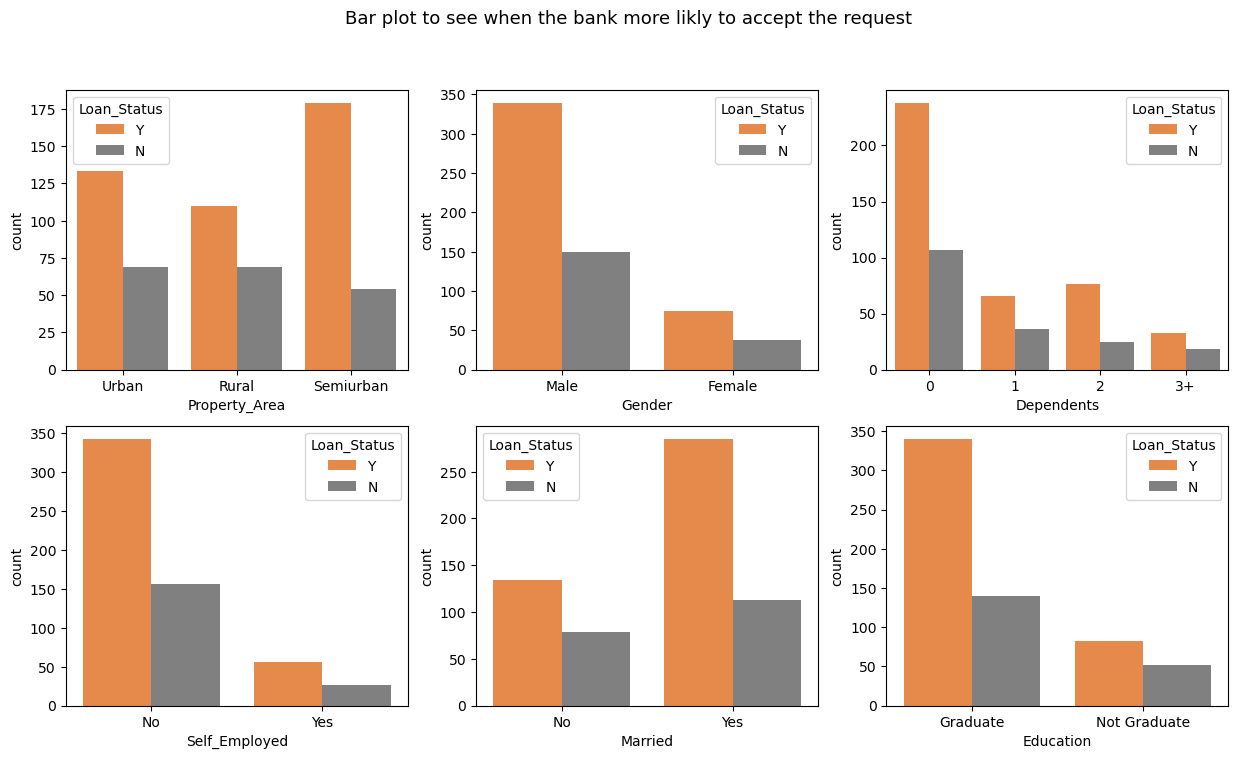

In [52]:
theme_colors = ["#ff8533", "#808080"]
font = 13

fig, axes = plt.subplots(nrows= 2, ncols= 3)

sns.countplot(data= df, x= "Property_Area", hue= "Loan_Status",
              palette= theme_colors, ax = axes[0, 0])

sns.countplot(data= df, x= "Gender", hue= "Loan_Status",
              palette= theme_colors, ax = axes[0, 1])

sns.countplot(data= df, x= "Married", hue= "Loan_Status",
              palette= theme_colors, ax = axes[1, 1])

sns.countplot(data= df, x= "Education", hue= "Loan_Status",
              palette= theme_colors, ax = axes[1, 2])

sns.countplot(data= df, x= "Self_Employed", hue= "Loan_Status",
              palette= theme_colors, ax = axes[1, 0])

sns.countplot(data= df, x= "Dependents", hue= "Loan_Status",
              palette= theme_colors, ax = axes[0, 2])

fig.set_size_inches(15, 8)
fig.suptitle("Bar plot to see when the bank more likly to accept the request", fontsize= font)
plt.show()

### Analysis
1. We can infer that count of married people who have got their loan approved is higher when compared to non- married people.
2. The count of applicants with 0 dependents have got their loan approved is higher.
3. The count of applicants who are graduates and have got their loan approved is greater than the one who are not graduates.
4. There is hardly any correlation between Loan_Status and Self_Employed applicants. So in short we can say that it doesn’t matter whether the applicant is self employed or not.

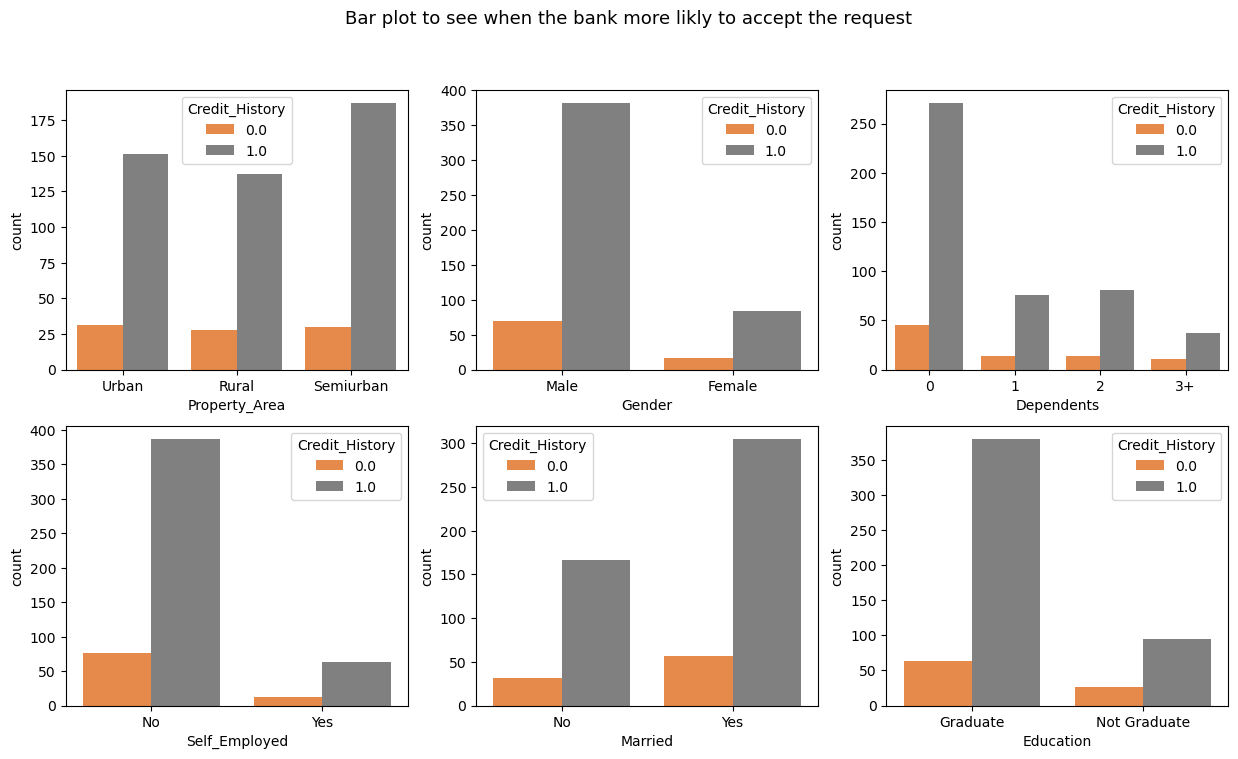

In [53]:
theme_colors = ["#ff8533", "#808080"]
font = 13

fig, axes = plt.subplots(nrows= 2, ncols= 3)

sns.countplot(data= df, x= "Property_Area", hue= "Credit_History",
              palette= theme_colors, ax = axes[0, 0])

sns.countplot(data= df, x= "Gender", hue= "Credit_History",
              palette= theme_colors, ax = axes[0, 1])

sns.countplot(data= df, x= "Married", hue= "Credit_History",
              palette= theme_colors, ax = axes[1, 1])

sns.countplot(data= df, x= "Education", hue= "Credit_History",
              palette= theme_colors, ax = axes[1, 2])

sns.countplot(data= df, x= "Self_Employed", hue= "Credit_History",
              palette= theme_colors, ax = axes[1, 0])

sns.countplot(data= df, x= "Dependents", hue= "Credit_History",
              palette= theme_colors, ax = axes[0, 2])

fig.set_size_inches(15, 8)
fig.suptitle("Bar plot to see when the bank more likly to accept the request", fontsize= font)
plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.
Look at box plots to understand the distributions. 
Look at the distribution of income segregated  by `Education`


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


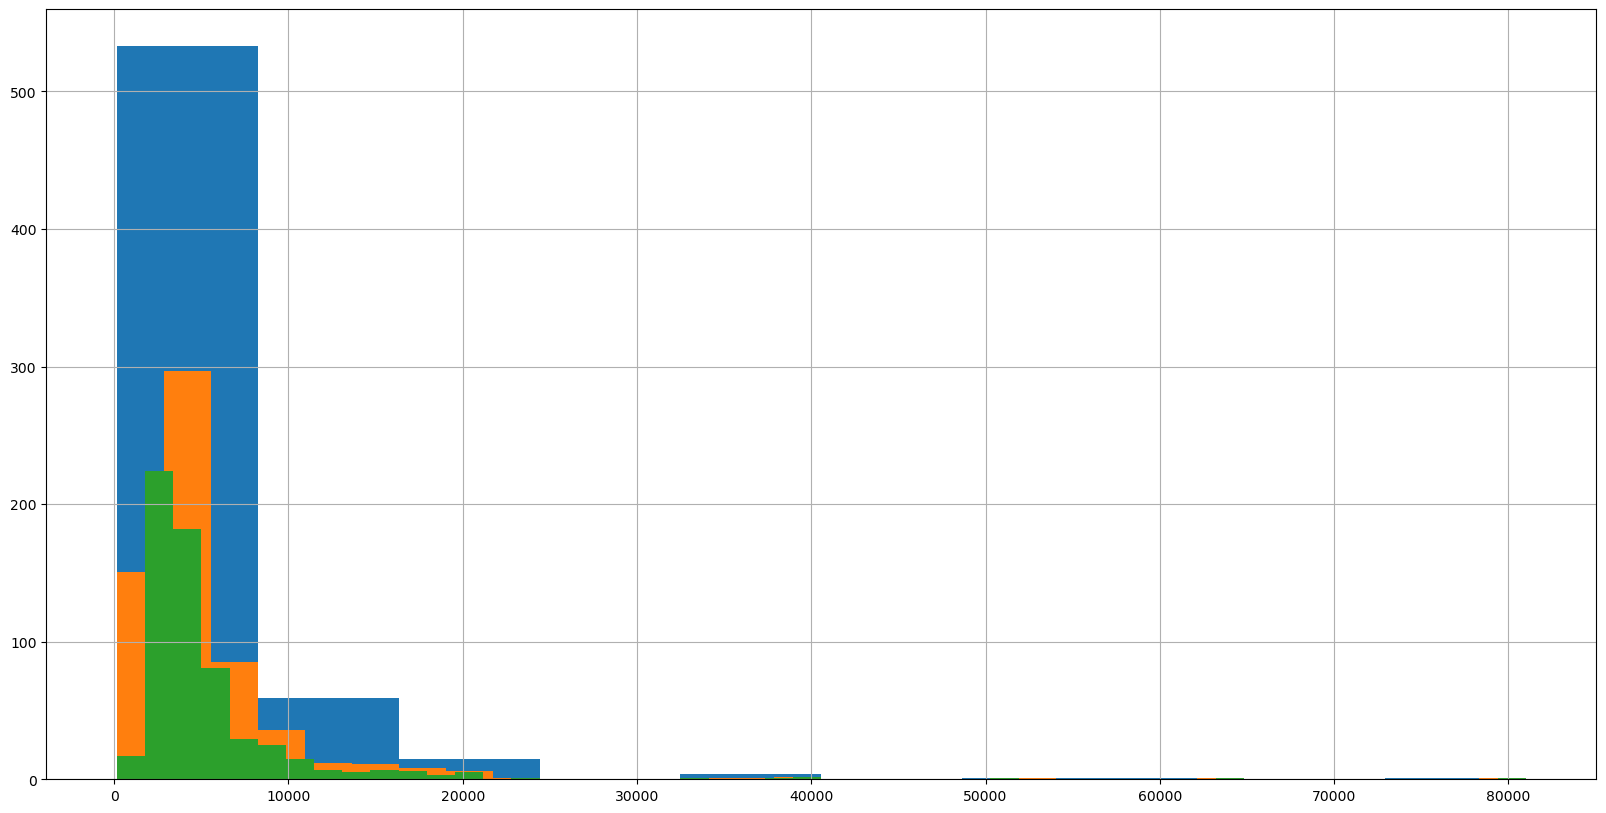

In [54]:
print(df['ApplicantIncome'].hist(bins=10,figsize=(20,10))) #Blue
print(df['ApplicantIncome'].hist(bins=30,figsize=(20,10))) #Orange
print(df['ApplicantIncome'].hist(bins=50,figsize=(20,10))) #Green


c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


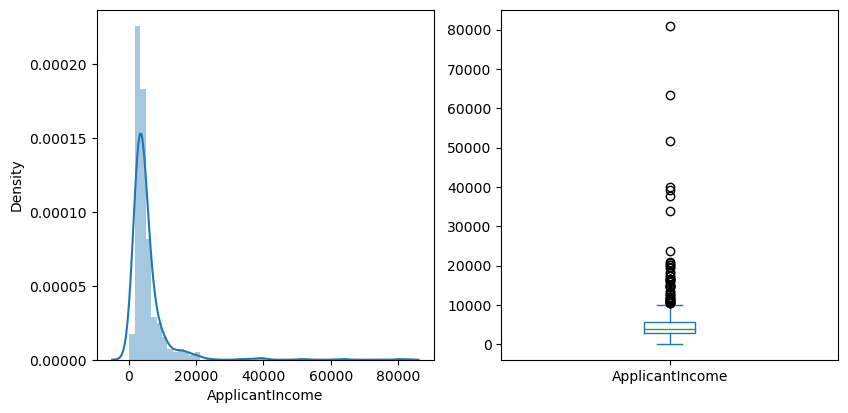

In [55]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df['ApplicantIncome'])
plt.subplot(242)
df['ApplicantIncome'].plot.box(figsize = (20,10))
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

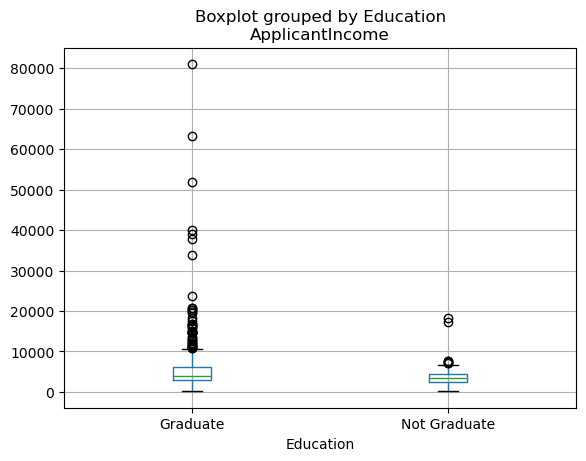

In [56]:
df.boxplot(column='ApplicantIncome', by = 'Education')


### Analysis
 Here we observe that there are few extreme values.Next, we look at box plots to understand the distributions. This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Look at the histogram and boxplot of LoanAmount

c:\Users\zarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


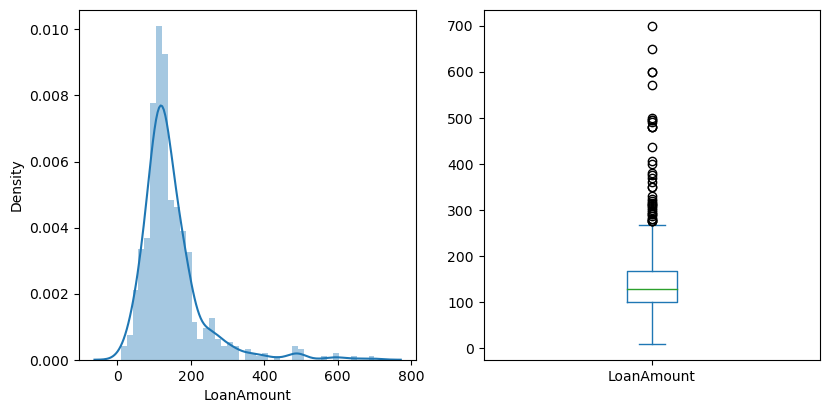

In [57]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df['LoanAmount'])
plt.subplot(242)
df['LoanAmount'].plot.box(figsize = (20,10))
plt.show()

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Education'>

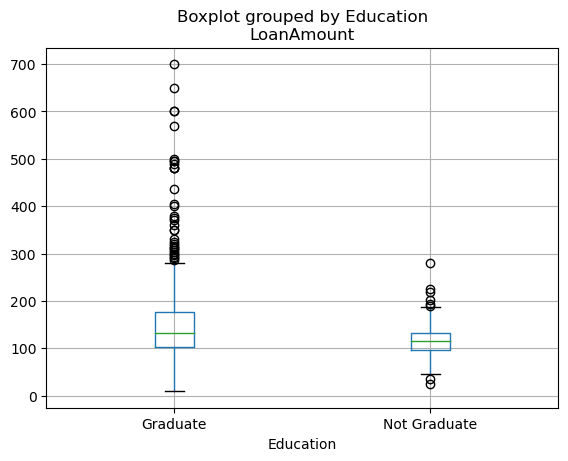

In [58]:
df.boxplot(column='LoanAmount', by = 'Education')


### Analysis
 Here we observe that there are few extreme values.Next, we look at box plots to understand the distributions. This confirms the presence of a lot of outliers/extreme values. This means that some people have received a higher loan than usual. One of the reason might be that applicants that graduted were given a higher loan due to the fact that they might have good jobs and means to return back the loan. However this still requires further analysis. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [59]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [60]:
#SINGLE INDEX PIVOT TABLE
table = pd.pivot_table(data=df,index=['Loan_Status'],aggfunc=[np.mean])
table

mean                                               \
            ApplicantIncome CoapplicantIncome Credit_History  LoanAmount   
Loan_Status                                                                
N               5446.078125       1877.807292       0.541899  151.220994   
Y               5384.068720       1504.516398       0.981818  144.294404   

                              
            Loan_Amount_Term  
Loan_Status                   
N                 344.064516  
Y                 341.072464

In [61]:
#MULTIPLE INDEX PIVOT TABLE
#different aggregate functions
table = pd.pivot_table(df,index=['Loan_Status'],aggfunc={'LoanAmount':np.mean, 'Credit_History':np.sum, 'ApplicantIncome':np.mean,'CoapplicantIncome':np.mean})
table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount
Loan_Status,,,,
N,5446.078125,1877.807292,97.0,151.220994
Y,5384.068720,1504.516398,378.0,144.294404


In [62]:
table = pd.pivot_table(df,index=['Gender'],aggfunc={'LoanAmount':np.mean, 'Credit_History':np.sum, 'ApplicantIncome':np.mean,'CoapplicantIncome':np.mean})
table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount
Gender,,,,
Female,4643.473214,1108.008929,84.0,126.697248
Male,5446.460123,1742.932352,382.0,149.265957


In [63]:
table = pd.pivot_table(df,index=['Married'],aggfunc={'LoanAmount':np.mean, 'Credit_History':np.sum, 'ApplicantIncome':np.mean,'CoapplicantIncome':np.mean})
table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount
Married,,,,
No,4970.384977,1316.558685,167.0,128.883495
Yes,5629.173367,1794.632965,305.0,155.750000


In [64]:
table = pd.pivot_table(df,index=['Self_Employed'],aggfunc={'LoanAmount':np.mean, 'Credit_History':np.sum, 'ApplicantIncome':np.mean,'CoapplicantIncome':np.mean})
table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount
Self_Employed,,,,
No,5049.748000,1580.989840,387.0,141.748963
Yes,7380.817073,1501.341463,63.0,172.000000


In [65]:
table = pd.pivot_table(df,index=['Education'],aggfunc={'LoanAmount':np.mean, 'Credit_History':np.sum, 'ApplicantIncome':np.mean,'CoapplicantIncome':np.mean})
table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount
Education,,,,
Graduate,5857.433333,1717.474833,380.0,154.060215
Not Graduate,3777.283582,1276.544776,95.0,118.409449


In [66]:
table = pd.pivot_table(df,index=['Loan_Status', 'Gender', 'Married', 'Self_Employed','Education'],aggfunc={'LoanAmount':np.mean, 'Credit_History':np.sum, 'ApplicantIncome':np.mean,'CoapplicantIncome':np.mean})
table

ApplicantIncome  \
Loan_Status Gender Married Self_Employed Education                       
N           Female No      No            Graduate          4201.473684   
                                         Not Graduate      3139.000000   
                           Yes           Graduate          4874.666667   
                                         Not Graduate      3867.000000   
                   Yes     No            Graduate          3504.400000   
                                         Not Graduate      2149.000000   
                           Yes           Graduate          8500.000000   
            Male   No      No            Graduate          5778.741935   
                                         Not Graduate      3438.555556   
                           Yes           Graduate          9681.600000   
                                         Not Graduate      3411.000000   
                   Yes     No            Graduate          7507.277778   
                                         Not Graduate      3603.620690   
                           Yes           Graduate          5479.555556   
                                         Not Graduate      4517.750000   
Y           Female No      No            Graduate          4117.823529   
                                         Not Graduate      2834.333333   
                           Yes           Graduate          7559.400000   
                                         Not Graduate     17714.000000   
                   Yes     No            Graduate          4639.875000   
                                         Not Graduate      3015.000000   
                           Yes           Graduate         19484.000000   
                                         Not Graduate      7142.000000   
            Male   No      No            Graduate          4870.500000   
                                         Not Graduate      3706.062500   
                           Yes           Graduate          8536.571429   
                                         Not Graduate      4191.500000   
                   Yes     No            Graduate          5170.633136   
                                         Not Graduate      3449.261905   
                           Yes           Graduate          8085.379310   
                                         Not Graduate      4541.200000   

                                                       CoapplicantIncome  \
Loan_Status Gender Married Self_Employed Education                         
N           Female No      No            Graduate             414.210526   
                                         Not Graduate           0.000000   
                           Yes           Graduate             572.333333   
                                         Not Graduate           0.000000   
                   Yes     No            Graduate            1554.400000   
                                         Not Graduate        3237.000000   
                           Yes           Graduate               0.000000   
            Male   No      No            Graduate            2184.774194   
                                         Not Graduate         554.666667   
                           Yes           Graduate             866.600000   
                                         Not Graduate        1984.000000   
                   Yes     No            Graduate            2203.833333   
                                         Not Graduate        1575.724138   
                           Yes           Graduate            3539.444444   
                                         Not Graduate        1296.250000   
Y           Female No      No            Graduate             718.823529   
                                         Not Graduate         394.166667   
                           Yes           Graduate               0.000000   
                                         Not Graduate           0.000000   
                

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python